<a href="https://colab.research.google.com/github/pierandreamorelli/stage/blob/main/cs_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scaletta
# Pipeline 1 - Data Preparation
1.   Caricare DF: PY, PPY
2.   Concatenare AN con PY, PPY
3.   Eliminare colonne duplicate (Pandas)
4.   Identificare colonne che hanno un solo valore e dropparle
5. Identificare colonne categoriche
6. Fare encoding one-hot per colonne categoriche
7. Identificare colonne numeriche
8. Fare re-scaling e normalizzare colonne numeriche
9. Gestire valori NaN

# Pipeline 2 - Training
1.   Identificare la Y (colonna target, presa da df_LY) 
2.   Opzionale: passare anche la Y nella data preparation 
3. Attaccare Y a df_res 
4. split train e test (80%, 20%)
5. identificare due/quattro modelli 
6. identificare le metriche di valutazione
7. effettuare il training dei modelli
8. valutarne le performance 



# Pipeline 1 - Data Preparation

1. **Upload DataFrame**

In [1]:
import pandas as pd

df_AN = pd.read_csv('/content/drive/MyDrive/dataset/cs_search.csv')
df_LY = pd.read_csv('/content/drive/MyDrive/dataset/cs_fs_lastyear.csv')
df_PY = pd.read_csv('/content/drive/MyDrive/dataset/cs_fs_prevyear.csv')
df_PPY = pd.read_csv('/content/drive/MyDrive/dataset/cs_fs_prevprevyear.csv')



In [ ]:
df_AN.set_index('id')

In [ ]:
df_LY.set_index('companyId')

In [ ]:
df_PY.set_index('companyId')

In [ ]:
df_PPY.set_index('companyId')

2. **Concat DataFrame Financial - Anagraphic**

In [ ]:
df_res_LY = df_AN.join(df_LY, lsuffix='_AN', rsuffix='_LY')

In [ ]:
df_res_PY = df_AN.join(df_PY, lsuffix='_AN', rsuffix='_PY')

In [ ]:
df_res_PPY = df_AN.join(df_PPY, lsuffix='_AN', rsuffix='_PPY')

3. **Duplicates Drop**

In [ ]:
df_res_LY = df_res_LY.loc[:,~df_res_LY.columns.duplicated()].copy()

In [ ]:
df_res_PY = df_res_PY.loc[:,~df_res_PY.columns.duplicated()].copy()

In [ ]:
df_res_PPY = df_res_PPY.loc[:,~df_res_PPY.columns.duplicated()].copy()

4. **Unique values drop**

In [ ]:
nunique = df_res_LY.nunique()
cols_to_drop = nunique[nunique == 1].index
df_res_LY = df_res_LY.drop(cols_to_drop, axis=1)

In [ ]:
nunique = df_res_PY.nunique()
cols_to_drop = nunique[nunique == 1].index
df_res_PY = df_res_PY.drop(cols_to_drop, axis=1)

In [ ]:
nunique = df_res_PPY.nunique()
cols_to_drop = nunique[nunique == 1].index
df_res_PPY = df_res_PPY.drop(cols_to_drop, axis=1)

5. **Categorical Columns Identification**

In [ ]:
cols = df_res_LY.columns
num_cols = df_res_LY._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

6. **Numeric Columns Identification**

In [39]:
num_cols = df_res_LY._get_numeric_data()

7. **Encoding One Hot Categorical Columns**

In [17]:
#df_LY with only categorical features
cat_df = pd.DataFrame()
for i in cat_cols:
  cat_df[i] = df_res_LY[i]

In [ ]:
onehot = pd.get_dummies(cat_df['officeType'])

8. **Scaling and Normalization num_cols**

In [20]:
#df_LY with only numerical features
num_df_LY = df_res_LY
for i in cat_cols:
  num_df_LY = num_df_LY.drop([i], axis = 1)

In [40]:
num_df_LY.head()

,index_AN,Unnamed: 0,activityCode,address.postCode,profitAndLoss.revenue,profitAndLoss.operatingCosts,profitAndLoss.operatingProfit,profitAndLoss.wagesAndSalaries,profitAndLoss.depreciation,profitAndLoss.amortisation,...,profitAndLoss.pensionCosts,balanceSheet.landAndBuildings,balanceSheet.plantAndMachinery,balanceSheet.goodwill,balanceSheet.investments,balanceSheet.rawMaterials,balanceSheet.finishedGoods,balanceSheet.totalInventories,balanceSheet.tradePayablesDueAfter1Year,ratios.stockTurnoverRatio
0,0,0,86903.0,153.0,512354,489130,23224,55995.0,1454.0,2520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,4671.0,144.0,16670667412,16374099231,296568181,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,4671.0,198.0,13175549443,12903185000,272364443,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.970781e+07,146462584.0,NaN,146462584.0,NaN,1.11
3,3,0,4671.0,148.0,7748650921,7972075317,-223424396,40016022.0,8171857.0,1037167.0,...,1470308.0,15024796.0,79109991.0,0.0,1.321276e+09,139243981.0,219857804.0,359101785.0,NaN,4.63
4,4,0,4635.0,193.0,3550318670,3455611488,94707182,26372632.0,4528953.0,1985055.0,...,NaN,6329331.0,11266641.0,NaN,3.761600e+06,NaN,402568213.0,402568213.0,NaN,11.34


In [22]:
from sklearn import preprocessing

x = num_df_LY.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

norm_df_LY = pd.DataFrame(x_scaled)
norm_df_LY.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.000000,0.0,0.123744,0.001153,0.000031,0.000004,0.398320,0.000135,0.000008,0.000030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002217,0.0,0.006638,0.001061,1.000000,1.000000,0.926943,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.004435,0.0,0.006638,0.001612,0.790343,0.788019,0.883798,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.003672,1.000000,NaN,0.363821,NaN,0.001954
3,0.006652,0.0,0.006638,0.001102,0.464807,0.486858,0.000000,0.096791,0.046636,0.012434,...,0.054611,0.008877,0.279806,0.0,0.246172,0.950714,0.546138,0.892027,NaN,0.008152
4,0.008869,0.0,0.006586,0.001561,0.212968,0.211021,0.567104,0.063790,0.025846,0.023797,...,NaN,0.003740,0.039849,NaN,0.000701,NaN,1.000000,1.000000,NaN,0.019967


In [23]:
num_df_PY = df_res_PY
for i in cat_cols:
  num_df_PY = num_df_PY.drop([i], axis = 1)

In [24]:
x = num_df_PY.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

norm_df_PY = pd.DataFrame(x_scaled)
norm_df_PY.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.000000,0.0,0.123744,0.001153,0.0,0.000019,0.000019,0.230992,0.000230,0.000027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002217,0.0,0.006638,0.001061,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.003577,0.000000,0.000000,0.0,0.005354,1.000000,0.000000,0.651522,0.0,0.003648
2,0.004435,0.0,0.006638,0.001612,0.0,0.812360,0.823238,0.169566,NaN,NaN,...,NaN,NaN,NaN,NaN,0.002913,0.788708,NaN,0.513861,NaN,0.003564
3,0.006652,0.0,0.006638,0.001102,0.0,0.397336,0.400181,0.357097,0.101165,0.047178,...,0.113756,0.010726,0.326106,0.0,0.249981,0.379002,0.926096,1.000000,NaN,0.014127
4,0.008869,0.0,0.006586,0.001561,0.0,0.100532,0.098797,0.417713,0.059295,0.025842,...,NaN,0.004581,0.048226,NaN,0.000144,NaN,1.000000,0.813168,NaN,0.045393


In [25]:
num_df_PPY = df_res_PPY
for i in cat_cols:
  num_df_PPY = num_df_PPY.drop([i], axis = 1)

In [26]:
x = num_df_PPY.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

norm_df_PPY = pd.DataFrame(x_scaled)
norm_df_PPY.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.000000,0.0,0.123744,0.001153,0.000025,0.000026,0.417278,0.000237,0.000032,0.000192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002217,0.0,0.006638,0.001061,1.000000,1.000000,0.509461,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.005376,1.000000,0.000000,1.000000,0.0,0.000007
2,0.004435,0.0,0.006638,0.001612,0.551461,0.554515,0.291751,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.003387,0.451223,NaN,0.451223,NaN,0.000006
3,0.006652,0.0,0.006638,0.001102,0.424274,0.432176,0.000000,0.236481,0.066108,0.227224,...,0.189612,0.015664,0.404025,0.0,0.250840,0.223229,0.873404,0.724152,NaN,0.000013
4,0.008869,0.0,0.006586,0.001561,0.087964,0.085713,0.555392,0.063345,0.028884,0.024958,...,NaN,0.005601,0.063714,NaN,0.000145,NaN,1.000000,0.573530,NaN,0.000048


# Pipeline 2 - Training

1. **PCA**

In [48]:
import numpy as np
from sklearn.decomposition import PCA
norm_LY = np.nan_to_num(norm_df_LY)
norm_LY = pd.DataFrame(norm_LY)
norm_LY.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.000000,0.0,0.123744,0.001153,0.000031,0.000004,0.398320,0.000135,0.000008,0.000030,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.002217,0.0,0.006638,0.001061,1.000000,1.000000,0.926943,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.004435,0.0,0.006638,0.001612,0.790343,0.788019,0.883798,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.003672,1.000000,0.000000,0.363821,0.0,0.001954
3,0.006652,0.0,0.006638,0.001102,0.464807,0.486858,0.000000,0.096791,0.046636,0.012434,...,0.054611,0.008877,0.279806,0.0,0.246172,0.950714,0.546138,0.892027,0.0,0.008152
4,0.008869,0.0,0.006586,0.001561,0.212968,0.211021,0.567104,0.063790,0.025846,0.023797,...,0.000000,0.003740,0.039849,0.0,0.000701,0.000000,1.000000,1.000000,0.0,0.019967


In [78]:
pca = PCA(n_components=2)
pca_LY = pca.fit_transform(norm_LY)
pca_DF_LY = pd.DataFrame(data = pca_LY
             , columns = ['PC1', 'PC2'])

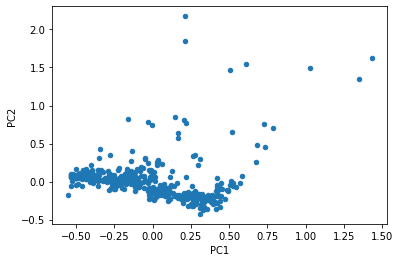

In [77]:
pca_DF_LY.plot.scatter(x='PC1', y='PC2')

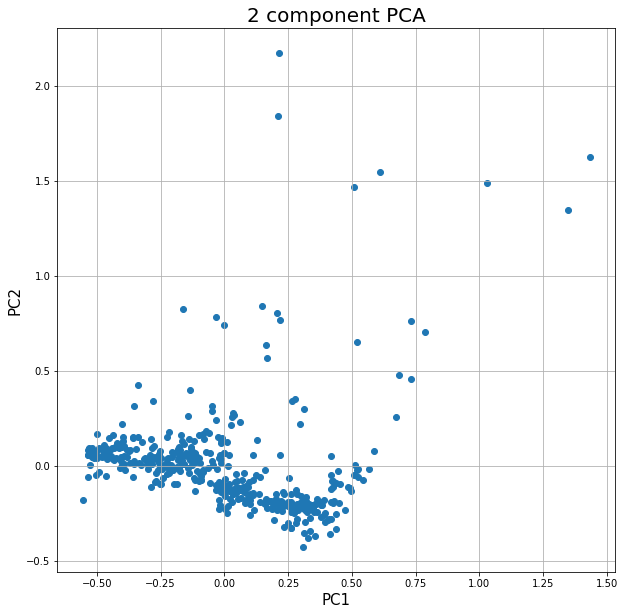

In [85]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15) 
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(pca_DF_LY['PC1'], pca_DF_LY['PC2'])
ax.grid()